Importando Bibliotecas Necessárias

In [2]:
#libs para modelagens e matrizes
import pandas as pd
import numpy as np

In [3]:
#libs para vizualizações Gráficas
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#libs para ignorar avisos
import warnings
warnings.filterwarnings('ignore')

In [5]:
#lendo os dados
df = pd.read_csv('PS4_GamesSales.csv', encoding='latin-1')

In [6]:
#verificando
df.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [7]:
#Dimensão do df
df.shape

(1034, 9)

In [8]:
#checando valores Nulos
df.isnull().sum()

Game               0
Year             209
Genre              0
Publisher        209
North America      0
Europe             0
Japan              0
Rest of World      0
Global             0
dtype: int64

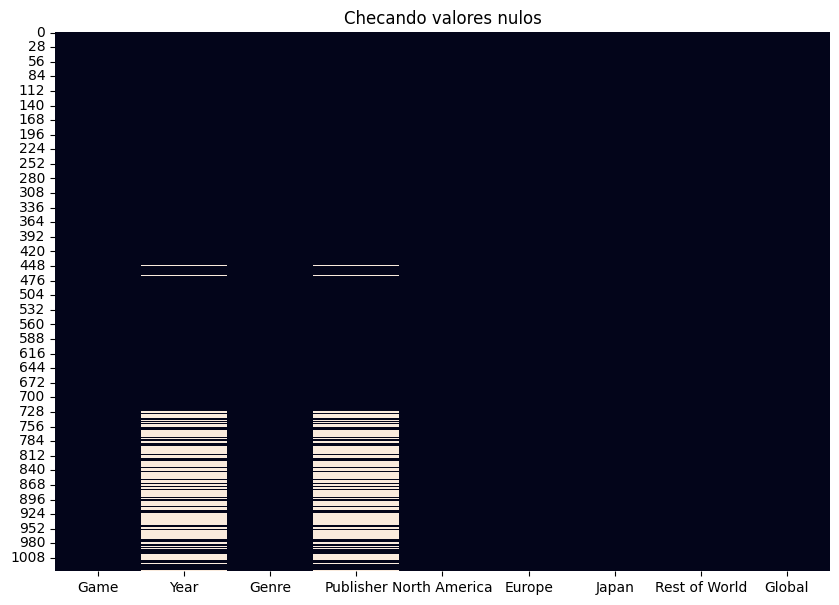

In [9]:
#Nulos Gráficos
plt.figure(figsize= (10,7))
plt.title('Checando valores nulos')
sns.heatmap(df.isnull(), cbar=False);


In [10]:
#excluindo valores nulos
df.dropna(inplace = True)

In [11]:
#conferindo se foram excluídos
df.isnull().sum()

Game             0
Year             0
Genre            0
Publisher        0
North America    0
Europe           0
Japan            0
Rest of World    0
Global           0
dtype: int64

In [12]:
#checando nova dimensão
df.shape

(825, 9)

In [13]:
#Análise de valores estatísticos
df.describe ()

,Year,North America,Europe,Japan,Rest of World,Global
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,2015.966061,0.256448,0.311600,0.042048,0.111552,0.721721
std,1.298360,0.620259,0.868271,0.119814,0.274713,1.743122
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.030000
50%,2016.000000,0.050000,0.020000,0.000000,0.020000,0.120000
75%,2017.000000,0.190000,0.220000,0.040000,0.090000,0.560000
max,2020.000000,6.180000,9.710000,2.170000,3.020000,19.390000


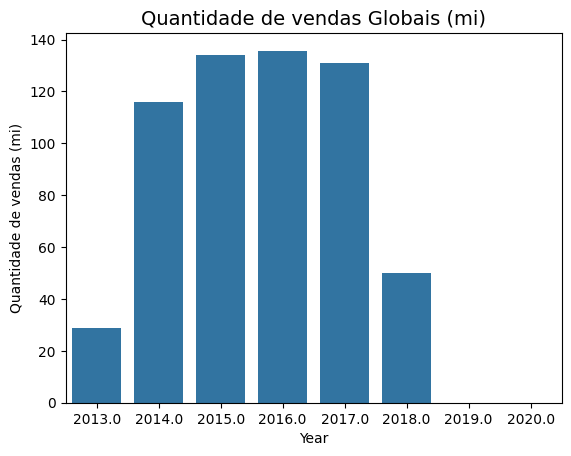

In [14]:
#análisando graficamente o data frame.
#título
plt.title('Quantidade de vendas Globais (mi)',fontsize = 14)

#Label
plt.ylabel('Quantidade de vendas (mi)')

#Gráfico
sns.barplot(data = df, x = 'Year', y = 'Global', ci = None,estimator=sum);

In [15]:
#retirar os anos de 2019 e 2020
df = df.loc[ (df['Year'] != 2019)  & (df['Year'] != 2020) ]

In [16]:
#conferindo se foram realmente excluídos
import plotly_express as px 
px.pie(df, names='Year')

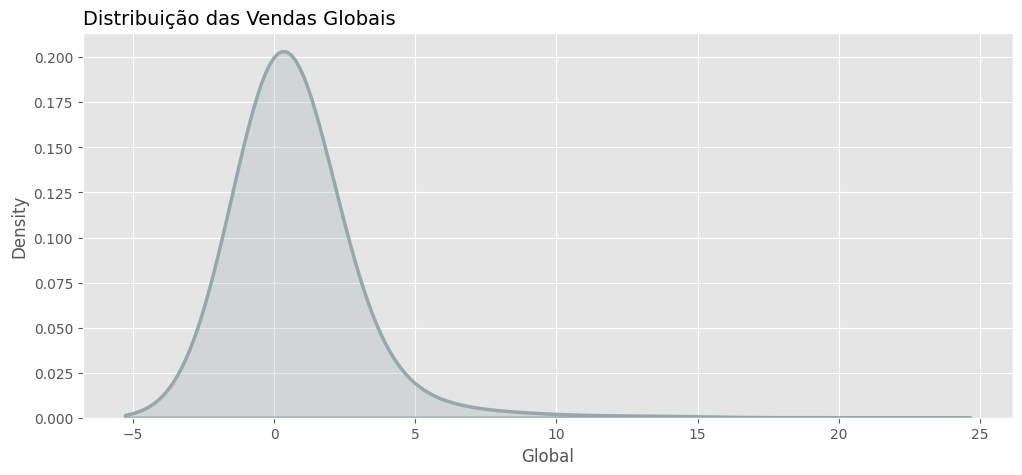

In [17]:
#Análisando a Distribuição das vendas

# Tamanho
plt.figure( figsize=(12, 5) )

#Estilo
plt.style.use('ggplot')

#título
plt.title('Distribuição das Vendas Globais', loc='left', fontsize=14 )

# Plot
sns.kdeplot( df['Global'], shade=True, bw=1, color='#96a8a8', linewidth=2.5 );

In [22]:
df.groupby(by = ['Year']).sum()

,Game,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
Year,,,,,,,,
2013.0,Call of Duty: GhostsBattlefield 4FIFA Soccer 1...,ShooterShooterSportsAction-AdventureShooterRac...,ActivisionElectronic ArtsEA SportsUbisoftSony ...,10.35,12.88,0.97,4.57,28.76
2014.0,Grand Theft Auto VCall of Duty: Advanced Warfa...,ActionShooterAction-AdventureMiscSportsShooter...,Rockstar GamesActivisionSony Computer Entertai...,39.80,54.12,3.58,18.29,115.85
2015.0,Call of Duty: Black Ops 3Fallout 4FIFA 16Star ...,ShooterRole-PlayingSportsShooterActionRole-Pla...,ActivisionBethesda SoftworksEA SportsElectroni...,49.60,56.21,7.28,20.88,133.99
2016.0,FIFA 17Uncharted (PS4)Call of Duty: Infinite W...,SportsActionShooterShooterRole-PlayingShooterS...,Electronic ArtsSony Interactive EntertainmentA...,47.40,57.98,9.65,20.71,135.72
2017.0,Call of Duty: WWIIFIFA 18Horizon: Zero DawnCra...,ShooterSportsActionPlatformShooterShooterActio...,ActivisionEA SportsSony Interactive Entertainm...,44.77,57.18,9.08,19.89,130.90
2018.0,Red Dead Redemption 2Spider-Man (PS4)God of Wa...,Action-AdventureAction-AdventureActionActionAc...,Rockstar GamesSony Interactive EntertainmentSo...,19.65,18.70,4.13,7.69,50.20


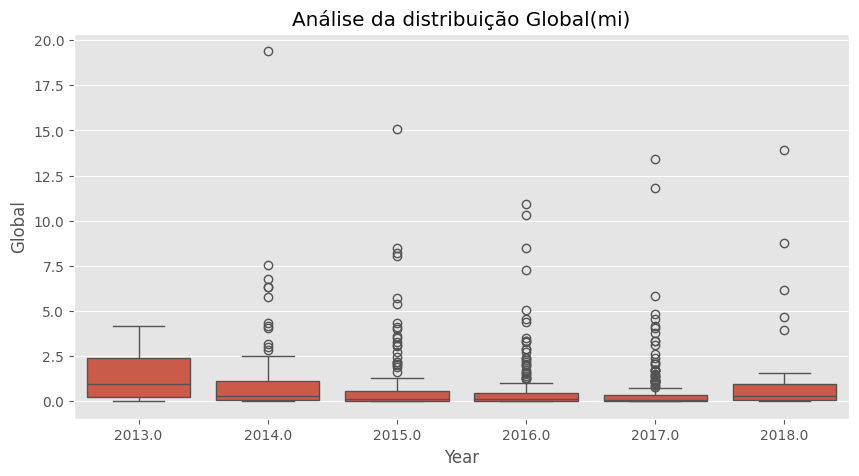

In [19]:
#tamanho
plt.figure(figsize=(10,5))

#título
plt.title('Análise da distribuição Global(mi)')


#Gráfico
sns.boxplot(data = df, x = 'Year', y = 'Global');



Possível checar os outliers por meio do BoxPlot acima

In [20]:
#possível analisar os jogos de maior sucesse
#As empresas que mais aparecem no topo das vendas
#Também vizualizar as características dos jogos mais vendidos
df.loc[ df['Global'] >= 10    ]

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
5,FIFA 17,2016.0,Sports,Electronic Arts,1.26,7.95,0.12,1.61,10.94
6,Uncharted (PS4),2016.0,Action,Sony Interactive Entertainment,4.49,3.93,0.21,1.70,10.33


In [24]:
Analise = df.groupby( by=['Year'] ).sum().reset_index()

# analisando a porcentagem de cada continemente em relação ao Total Global
America = [ America / Total * 100 for America, Total in zip( Analise['North America'], Analise['Global'] ) ]
Europa = [ Europa / Total * 100 for Europa, Total in zip( Analise['Europe'], Analise['Global'] ) ]
Japao = [ Japao / Total * 100 for Japao, Total in zip( Analise['Japan'], Analise['Global'] ) ]
Mundo = [ Mundo / Total * 100 for Mundo, Total in zip( Analise['Rest of World'], Analise['Global'] ) ]

America, Europa, Japao, Mundo

([35.9874826147427,
  34.35476909797151,
  37.01768788715576,
  34.92484526967286,
  34.20168067226891,
  39.14342629482071],
 [44.78442280945759,
  46.71558049201555,
  41.95089185760131,
  42.72030651340996,
  43.68220015278838,
  37.25099601593625],
 [3.372739916550765,
  3.0902028485110056,
  5.433241286663184,
  7.110226937813145,
  6.936592818945759,
  8.227091633466136],
 [15.890125173852576,
  15.78765645230902,
  15.58325248152847,
  15.259357500736812,
  15.194805194805195,
  15.31872509960159])

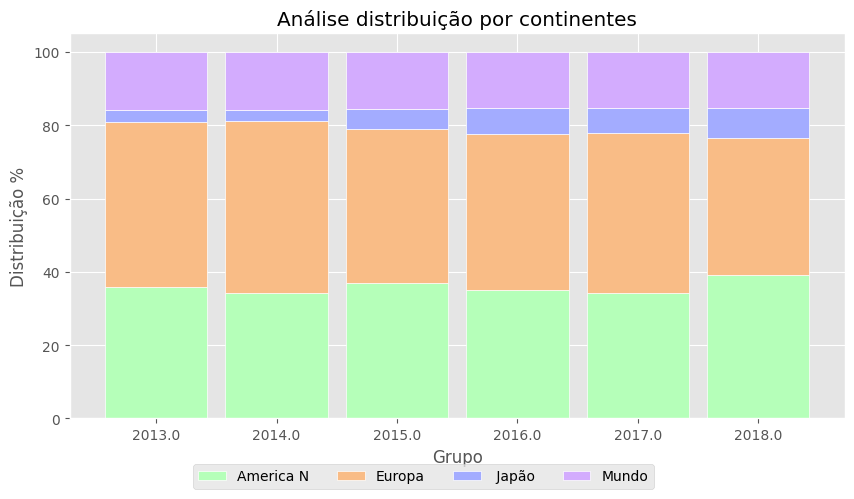

In [29]:
#Realizando um plot de Análise de distribuição por continente por empilhamento

# Tamanho 
plt.figure( figsize=(10, 5) )

# LArgura barra no gráfico
Largura_Barra = 0.85
Rotulos = Analise['Year']
Grupos = [0, 1, 2, 3, 4, 5]

# titulo
plt.title('Análise distribuição por continentes')

# Plot da America
plt.bar( Grupos, America, width=Largura_Barra, color='#b5ffb9', edgecolor='white' )

# Plot da Europa
plt.bar( Grupos, Europa, bottom=America, width=Largura_Barra, color='#f9bc86', edgecolor='white' )

# Plot do Japao
plt.bar( Grupos, Japao, bottom=[ A + B for A, B in zip(America, Europa) ], width=Largura_Barra, color='#a3acff', edgecolor='white' )

# Plot do Resto do mundo
plt.bar( Grupos, Mundo, bottom=[ A + B + C for A, B, C in zip(America, Europa, Japao) ], width=Largura_Barra, color='#d3acfe', edgecolor='white' )

# Labels
plt.xticks( Grupos, Rotulos )
plt.xlabel('Grupo')
plt.ylabel('Distribuição %')

# Legenda
plt.legend( ['America N', 'Europa',' Japão', 'Mundo'], loc='upper left', bbox_to_anchor=(0.15, -0.1), ncol=4 );

In [30]:
df.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [32]:
df['Publisher'].unique()

array(['Rockstar Games', 'Activision', 'EA Sports', 'Electronic Arts',
       'Sony Interactive Entertainment', 'Bethesda Softworks',
       'Sony Computer Entertainment', 'Namco Bandai Games', 'Square Enix',
       'Capcom', 'Blizzard Entertainment', 'Ubisoft',
       'Warner Bros. Interactive', '2K Sports',
       'Warner Bros. Interactive Entertainment',
       'Konami Digital Entertainment', '2K Games', 'Hello Games',
       '505 Games', 'Deep Silver', 'Take-Two Interactive',
       'Bandai Namco Games', 'Sega', 'Tecmo Koei', 'Gearbox Software',
       'Mojang', 'Disney Interactive Studios', 'Focus Home Interactive',
       'Studio Wildcard', 'Codemasters', 'Koch Media',
       'Harmonix Music Systems', 'Rebellion Developments', 'Gun Media',
       'Telltale Games', 'Kalypso Media', 'City Interactive',
       'NIS America', 'Sold Out', 'Tripwire Interactive', 'PQube',
       'THQ Nordic', 'Milestone S.r.l.', 'Nordic Games', 'Astragon',
       'Koei Tecmo', 'Frontier Developments', 

In [35]:
#convertendo os produtores de jogos para variáveis quantitativas
#para uma vizualização gráfica mais limpa
#importando o label encoder para realizar a tarefa
from sklearn.preprocessing import LabelEncoder
Funcao_Label = LabelEncoder()


In [40]:
#convertendo e criando uma nova coluna no df com os valores Quantitativos
df['Produtor'] = Funcao_Label.fit_transform( df['Publisher'])
df.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Produtor
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39,107
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09,8
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94,107
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40,8
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80,40


In [43]:
#fazendo a mesma coisa com as colunas "Genre" e "game"
df['Genero'] = Funcao_Label.fit_transform( df['Genre'])
df['Jogo'] = Funcao_Label.fit_transform( df['Game'])
df.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Produtor,Genero,Jogo
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39,107,0,273
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09,8,12,98
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94,107,1,521
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40,8,12,102
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80,40,14,222


In [46]:
Paleta_Cores = sns.color_palette('husl', 8)
Paleta_Cores

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8087954113106306, 0.5634700050056693, 0.19502642696727285),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.19783576093349015, 0.6955516966063037, 0.3995301037444499),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.22335772267769388, 0.6565792317435265, 0.8171355503265633),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 (0.9603888539940703, 0.3814317878772117, 0.8683117650835491)]

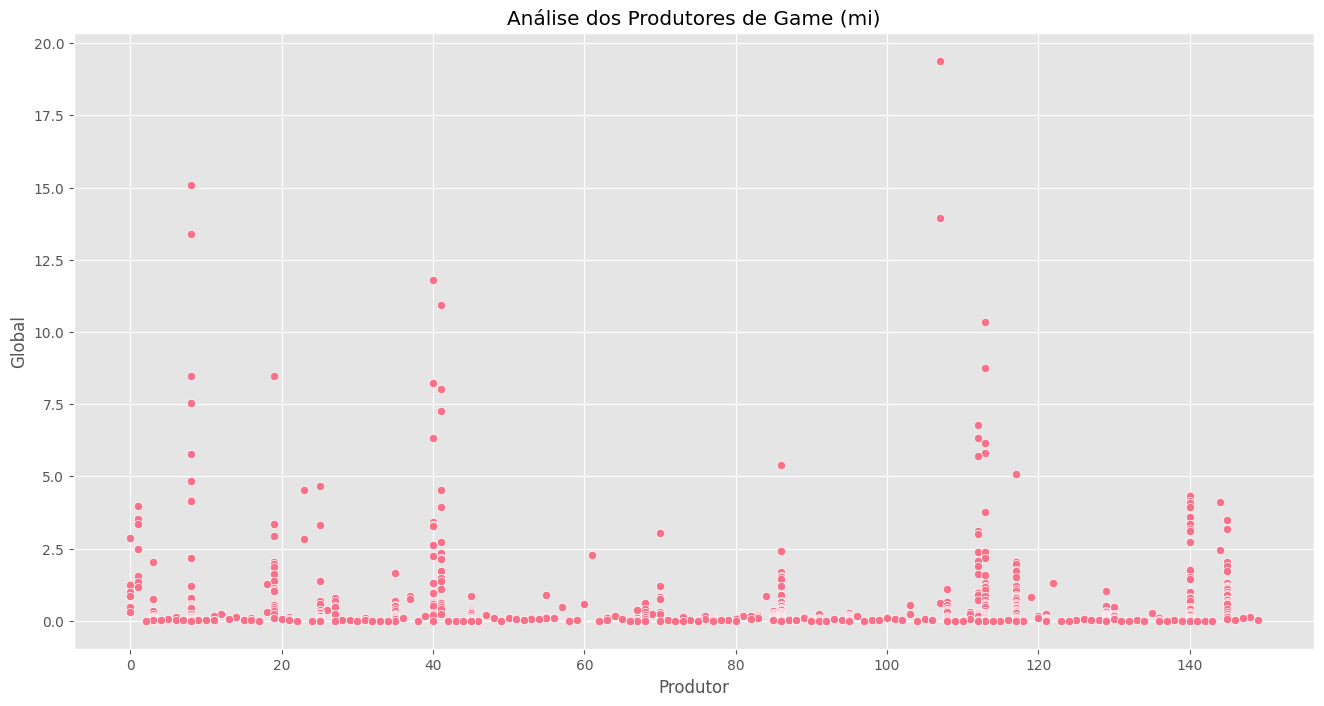

In [52]:
#vizualização Gráfica de Distribuição das Variáveis

plt.figure(figsize=(16,8))
plt.title('Análise dos Produtores de Game (mi)')
sns.scatterplot(data = df, x = 'Produtor', y = 'Global', color= Paleta_Cores[0]);


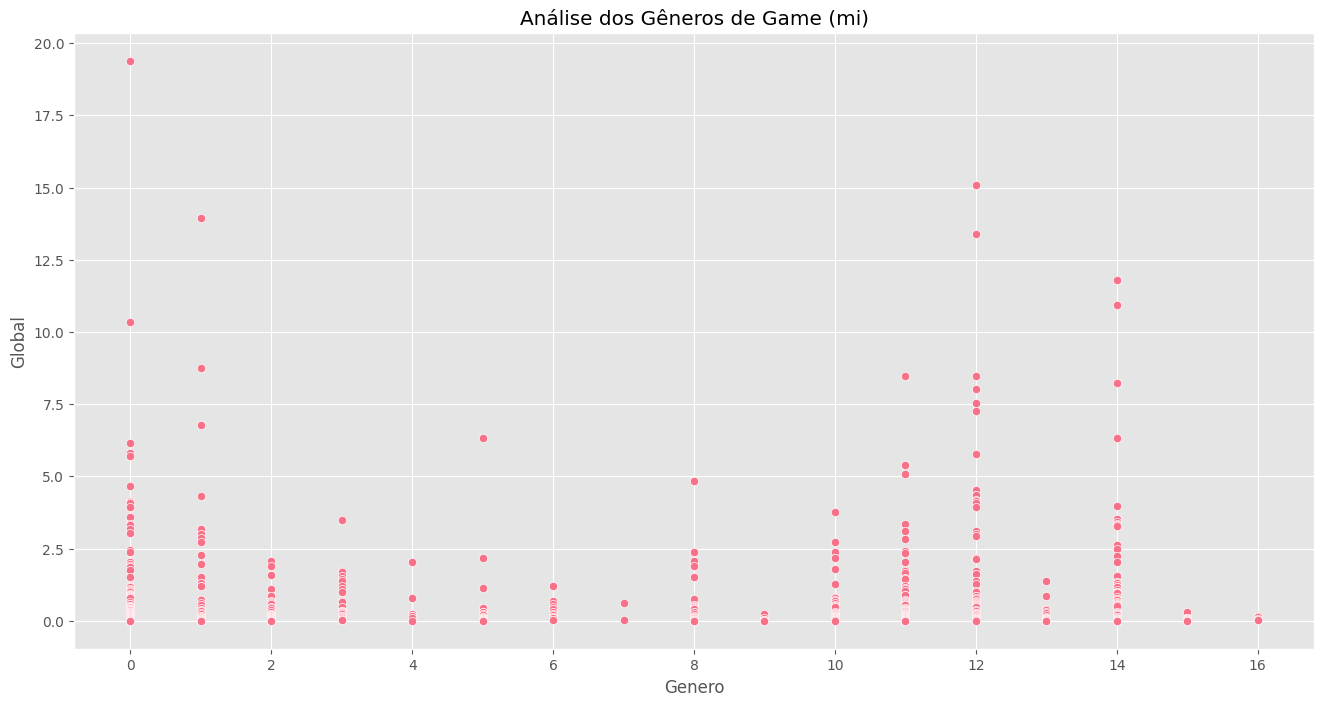

In [53]:
#vizualização Gráfica de Distribuição das Variáveis

plt.figure(figsize=(16,8))
plt.title('Análise dos Gêneros de Game (mi)')
sns.scatterplot(data = df, x = 'Genero', y = 'Global', color= Paleta_Cores[0]);

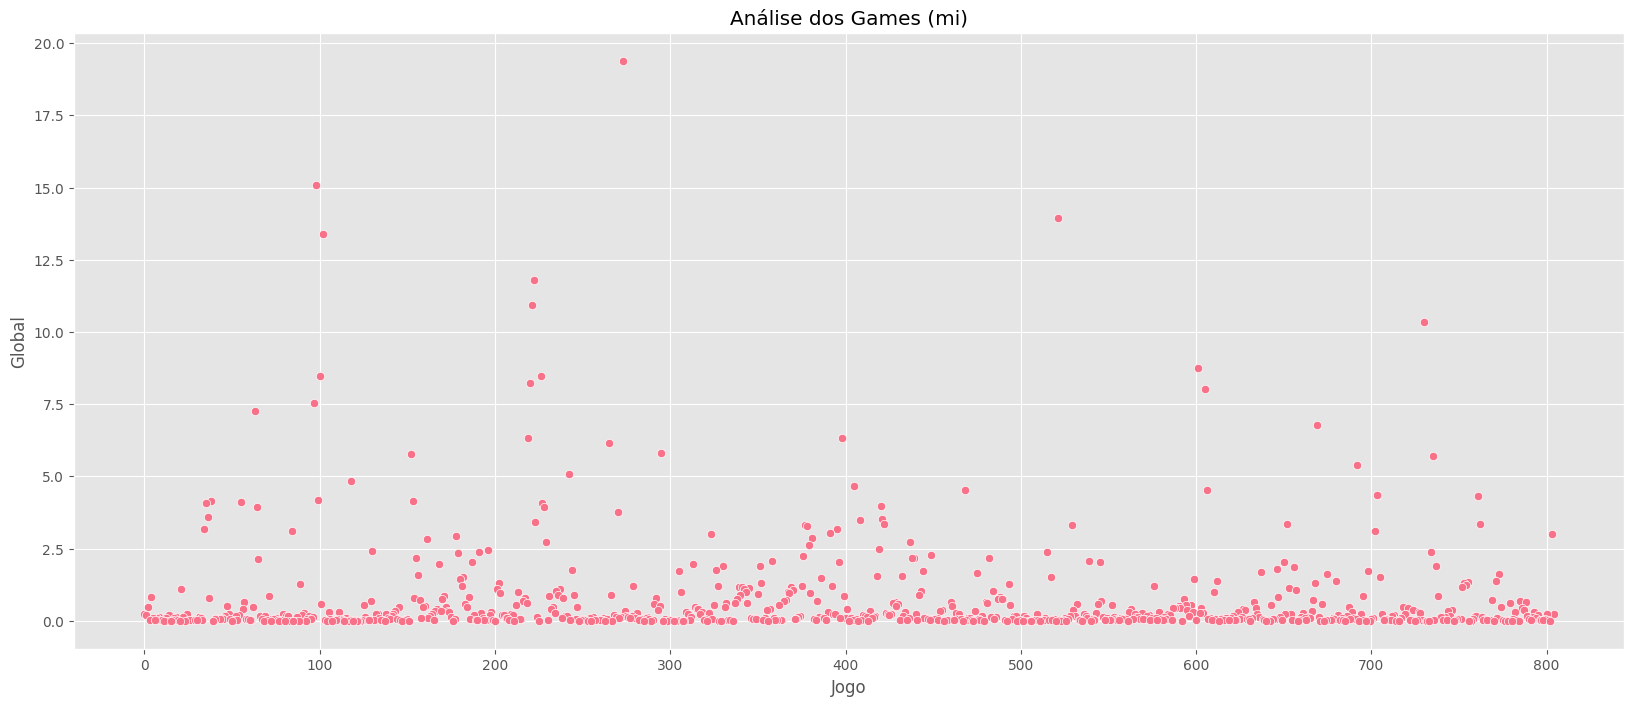

In [56]:
#vizualização Gráfica de Distribuição das Variáveis

plt.figure( figsize=(20,8))
plt.title('Análise dos Games (mi)')
sns.scatterplot(data=df, x='Jogo', y='Global', color=Paleta_Cores[0] );

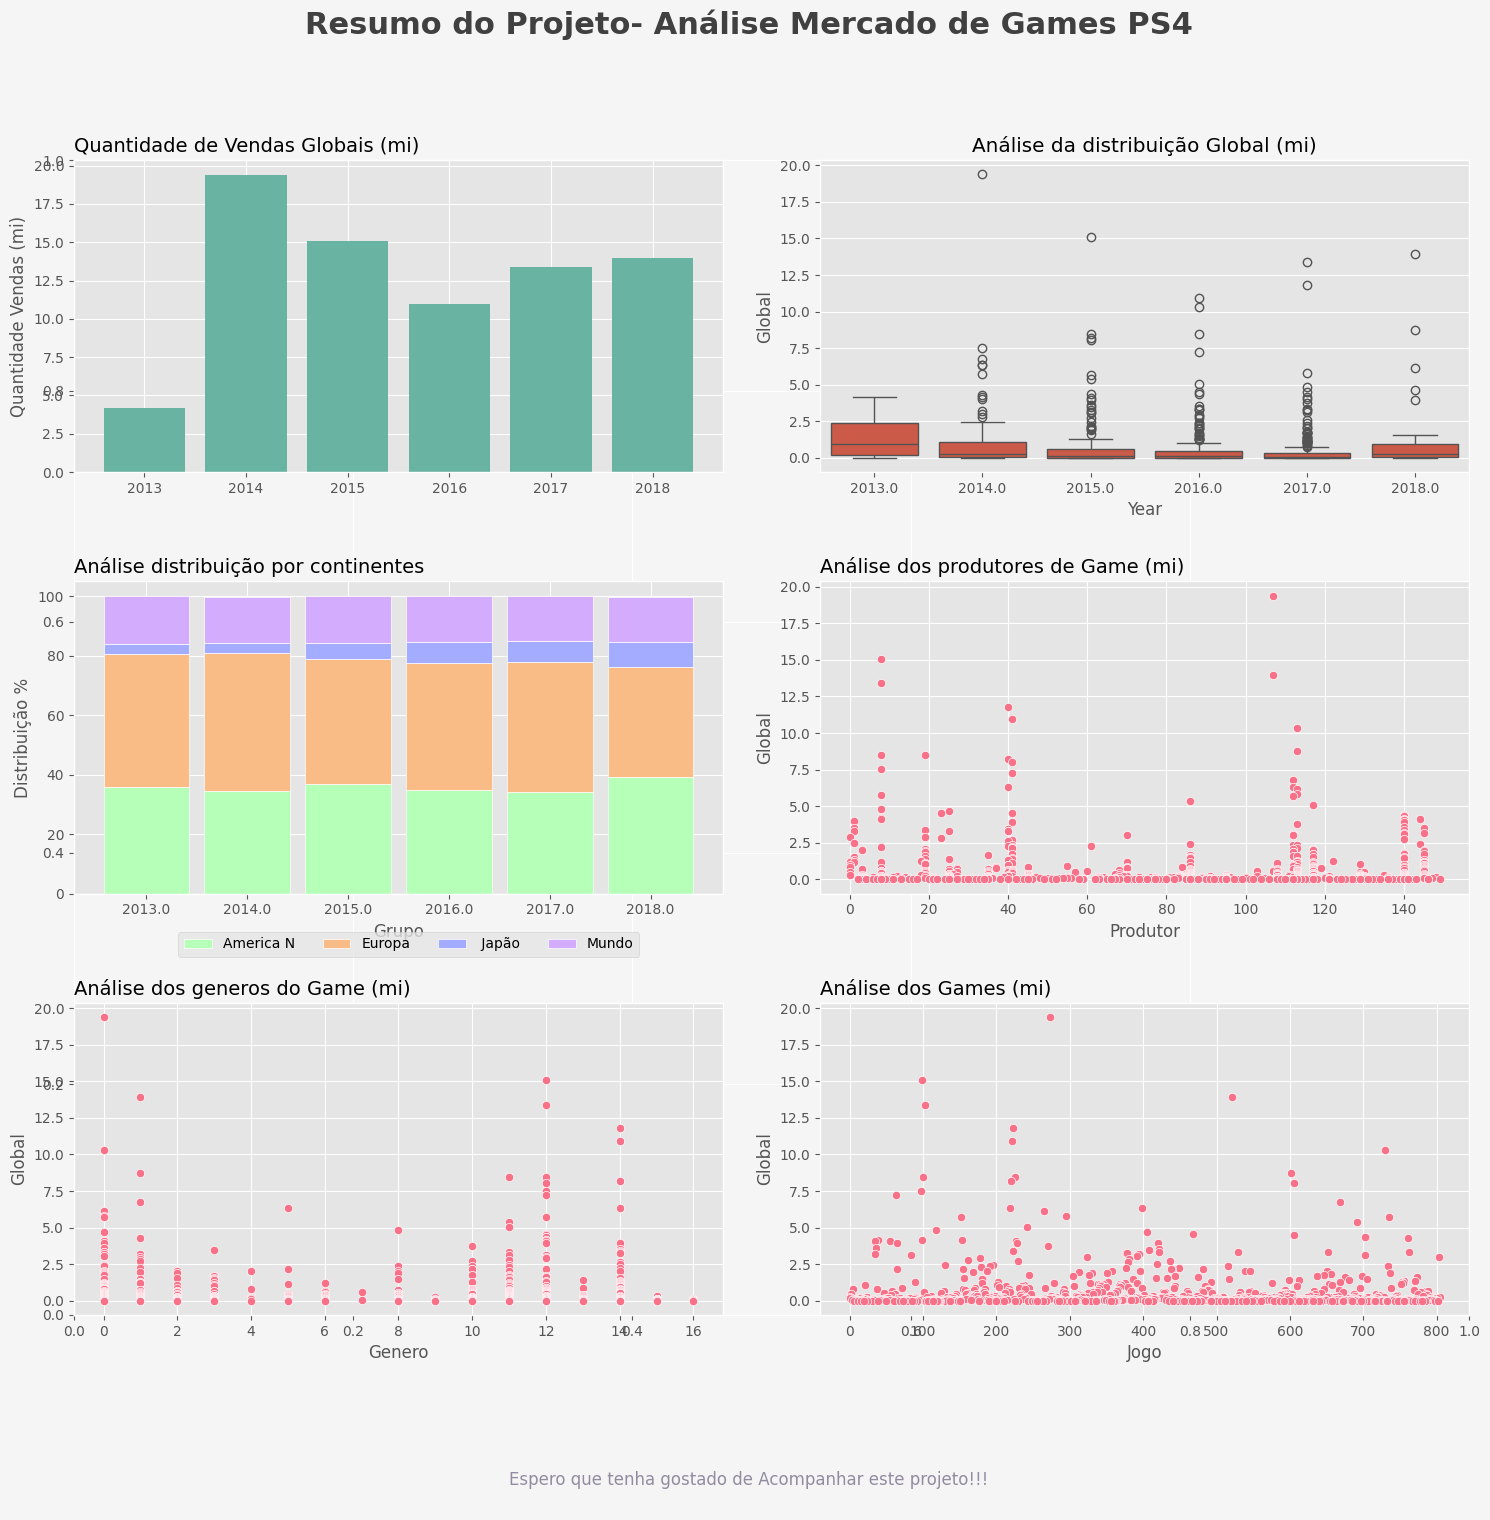

In [61]:

# Tamanhos das Imagens
fig, ax = plt.subplots( figsize=(18, 15) )

# Cor de fundo
Cor_Fundo = '#f5f5f5'
ax.set_facecolor( Cor_Fundo )
fig.set_facecolor( Cor_Fundo )

# Estilo dos gráficos
plt.style.use('ggplot')

# Titulo da figura
plt.suptitle('Resumo do Projeto- Análise Mercado de Games PS4', fontsize=22, color='#404040', fontweight=600 )

# Parametros para o grid 
Linhas = 3
Colunas = 2

# Acessando gráfico 1
plt.subplot( Linhas, Colunas, 1)
# Titulo
plt.title('Quantidade de Vendas Globais (mi)', loc='left', fontsize=14 )
# Grafico
plt.bar( df['Year'], df['Global'], color='#69b3a2' )
# Label
plt.ylabel('Quantidade Vendas (mi)')


# Acessando gráfico 2
plt.subplot( Linhas, Colunas, 2)
# titulo
plt.title('Análise da distribuição Global (mi)')
# Plot
sns.boxplot( data=df, x='Year', y='Global')


# Acessando gráfico 3
plt.subplot( Linhas, Colunas, 3)
# LArgura barra no gráfico
Largura_Barra = 0.85
Rotulos = Analise['Year']
Grupos = [0, 1, 2, 3, 4, 5]
# titulo
plt.title('Análise distribuição por continentes', loc='left', fontsize=14)
# Plot da America
plt.bar( Grupos, America, width=Largura_Barra, color='#b5ffb9', edgecolor='white' )
# Plot da Europa
plt.bar( Grupos, Europa, bottom=America, width=Largura_Barra, color='#f9bc86', edgecolor='white' )
# Plot do Japao
plt.bar( Grupos, Japao, bottom=[ A + B for A, B in zip(America, Europa) ], width=Largura_Barra, color='#a3acff', edgecolor='white' )
# Plot do Resto do mundo
plt.bar( Grupos, Mundo, bottom=[ A + B + C for A, B, C in zip(America, Europa, Japao) ], width=Largura_Barra, color='#d3acfe', edgecolor='white' )
# Labels
plt.xticks( Grupos, Rotulos )
plt.xlabel('Grupo')
plt.ylabel('Distribuição %')
# Legenda
plt.legend( ['America N', 'Europa',' Japão', 'Mundo'], loc='upper left', bbox_to_anchor=(0.15, -0.1), ncol=4 );


# Acessando gráfico 4
plt.subplot( Linhas, Colunas, 4)
plt.title('Análise dos produtores de Game (mi)', loc='left', fontsize=14 )
sns.scatterplot(data=df, x='Produtor', y='Global', color=Paleta_Cores[0] );


# Acessando gráfico 5
plt.subplot( Linhas, Colunas, 5)
plt.title('Análise dos generos do Game (mi)', loc='left', fontsize=14)
sns.scatterplot(data=df, x='Genero', y='Global', color=Paleta_Cores[0] );


# Acessando gráfico 6
plt.subplot( Linhas, Colunas, 6)
plt.title('Análise dos Games (mi)', loc='left', fontsize=14)
sns.scatterplot(data=df, x='Jogo', y='Global', color=Paleta_Cores[0] );


# Ajustar o layout
plt.subplots_adjust( hspace=0.35, wspace=0.15 )

# Rodapé
Rodape = '''
Espero que tenha gostado de Acompanhar este projeto!!!
'''

# Incluindo o rodape no relatorio
fig.text( 0.5, -0.02, Rodape, ha='center', va='bottom', size=12, color='#938ca1');